### Load Modules

In [1]:
from pathlib import Path
import json
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#Link type map
from tld.linktypes import fine_linktype_map

### Load Data

In [3]:
results_dir = Path.cwd() / 'tld' / 'results' / 'bert-results'
# results_dir = Path.cwd() / 'results' / 'distill-results'

class_rep_d = {}
conf_mat_d = {}
REPOS = []

for run_dir in results_dir.iterdir():
    run_name = run_dir.name
    if 'linktype' in (run_name.split('_')) and 'plus' in (run_name.split('_')):
        repo = run_name.split('_')[0]
        REPOS.append(repo)
        
        print(repo)
        
        with (run_dir / 'run_config.json').open('r', encoding='utf8') as f:
            run_config = json.load(f)
        test_output = np.load(run_dir / 'test_output.npz')
        
        class_rep = classification_report(
            test_output['labels'],
            test_output['logits'].argmax(axis=-1),
            target_names=run_config['label_names'],
            output_dict = True
        )
        
        
        class_rep_df = pd.DataFrame(class_rep).transpose()
        
        class_rep_d[repo] = class_rep_df
        
        conf_mat = confusion_matrix(
            test_output['labels'],
            test_output['logits'].argmax(axis=-1),
            normalize='true'
        )
        conf_mat = np.round(conf_mat, 2)
    
        conf_mat_df = pd.DataFrame(conf_mat, columns=run_config['label_names'], index=run_config['label_names']).transpose()
        conf_mat_d[repo] = conf_mat_df

secondlife
jira
jiraecosystem
hyperledger
inteldaos
sakai
mariadb
apache


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


mongodb
jfrog
sonatype
mojang
redhat


/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


spring
qt


In [49]:
#Sort Repos alphabetically
REPOS.sort()
REPOS

['apache',
 'hyperledger',
 'inteldaos',
 'jfrog',
 'jira',
 'jiraecosystem',
 'mariadb',
 'mojang',
 'mongodb',
 'qt',
 'redhat',
 'sakai',
 'secondlife',
 'sonatype',
 'spring']

### Confusion Matrix Figure 2

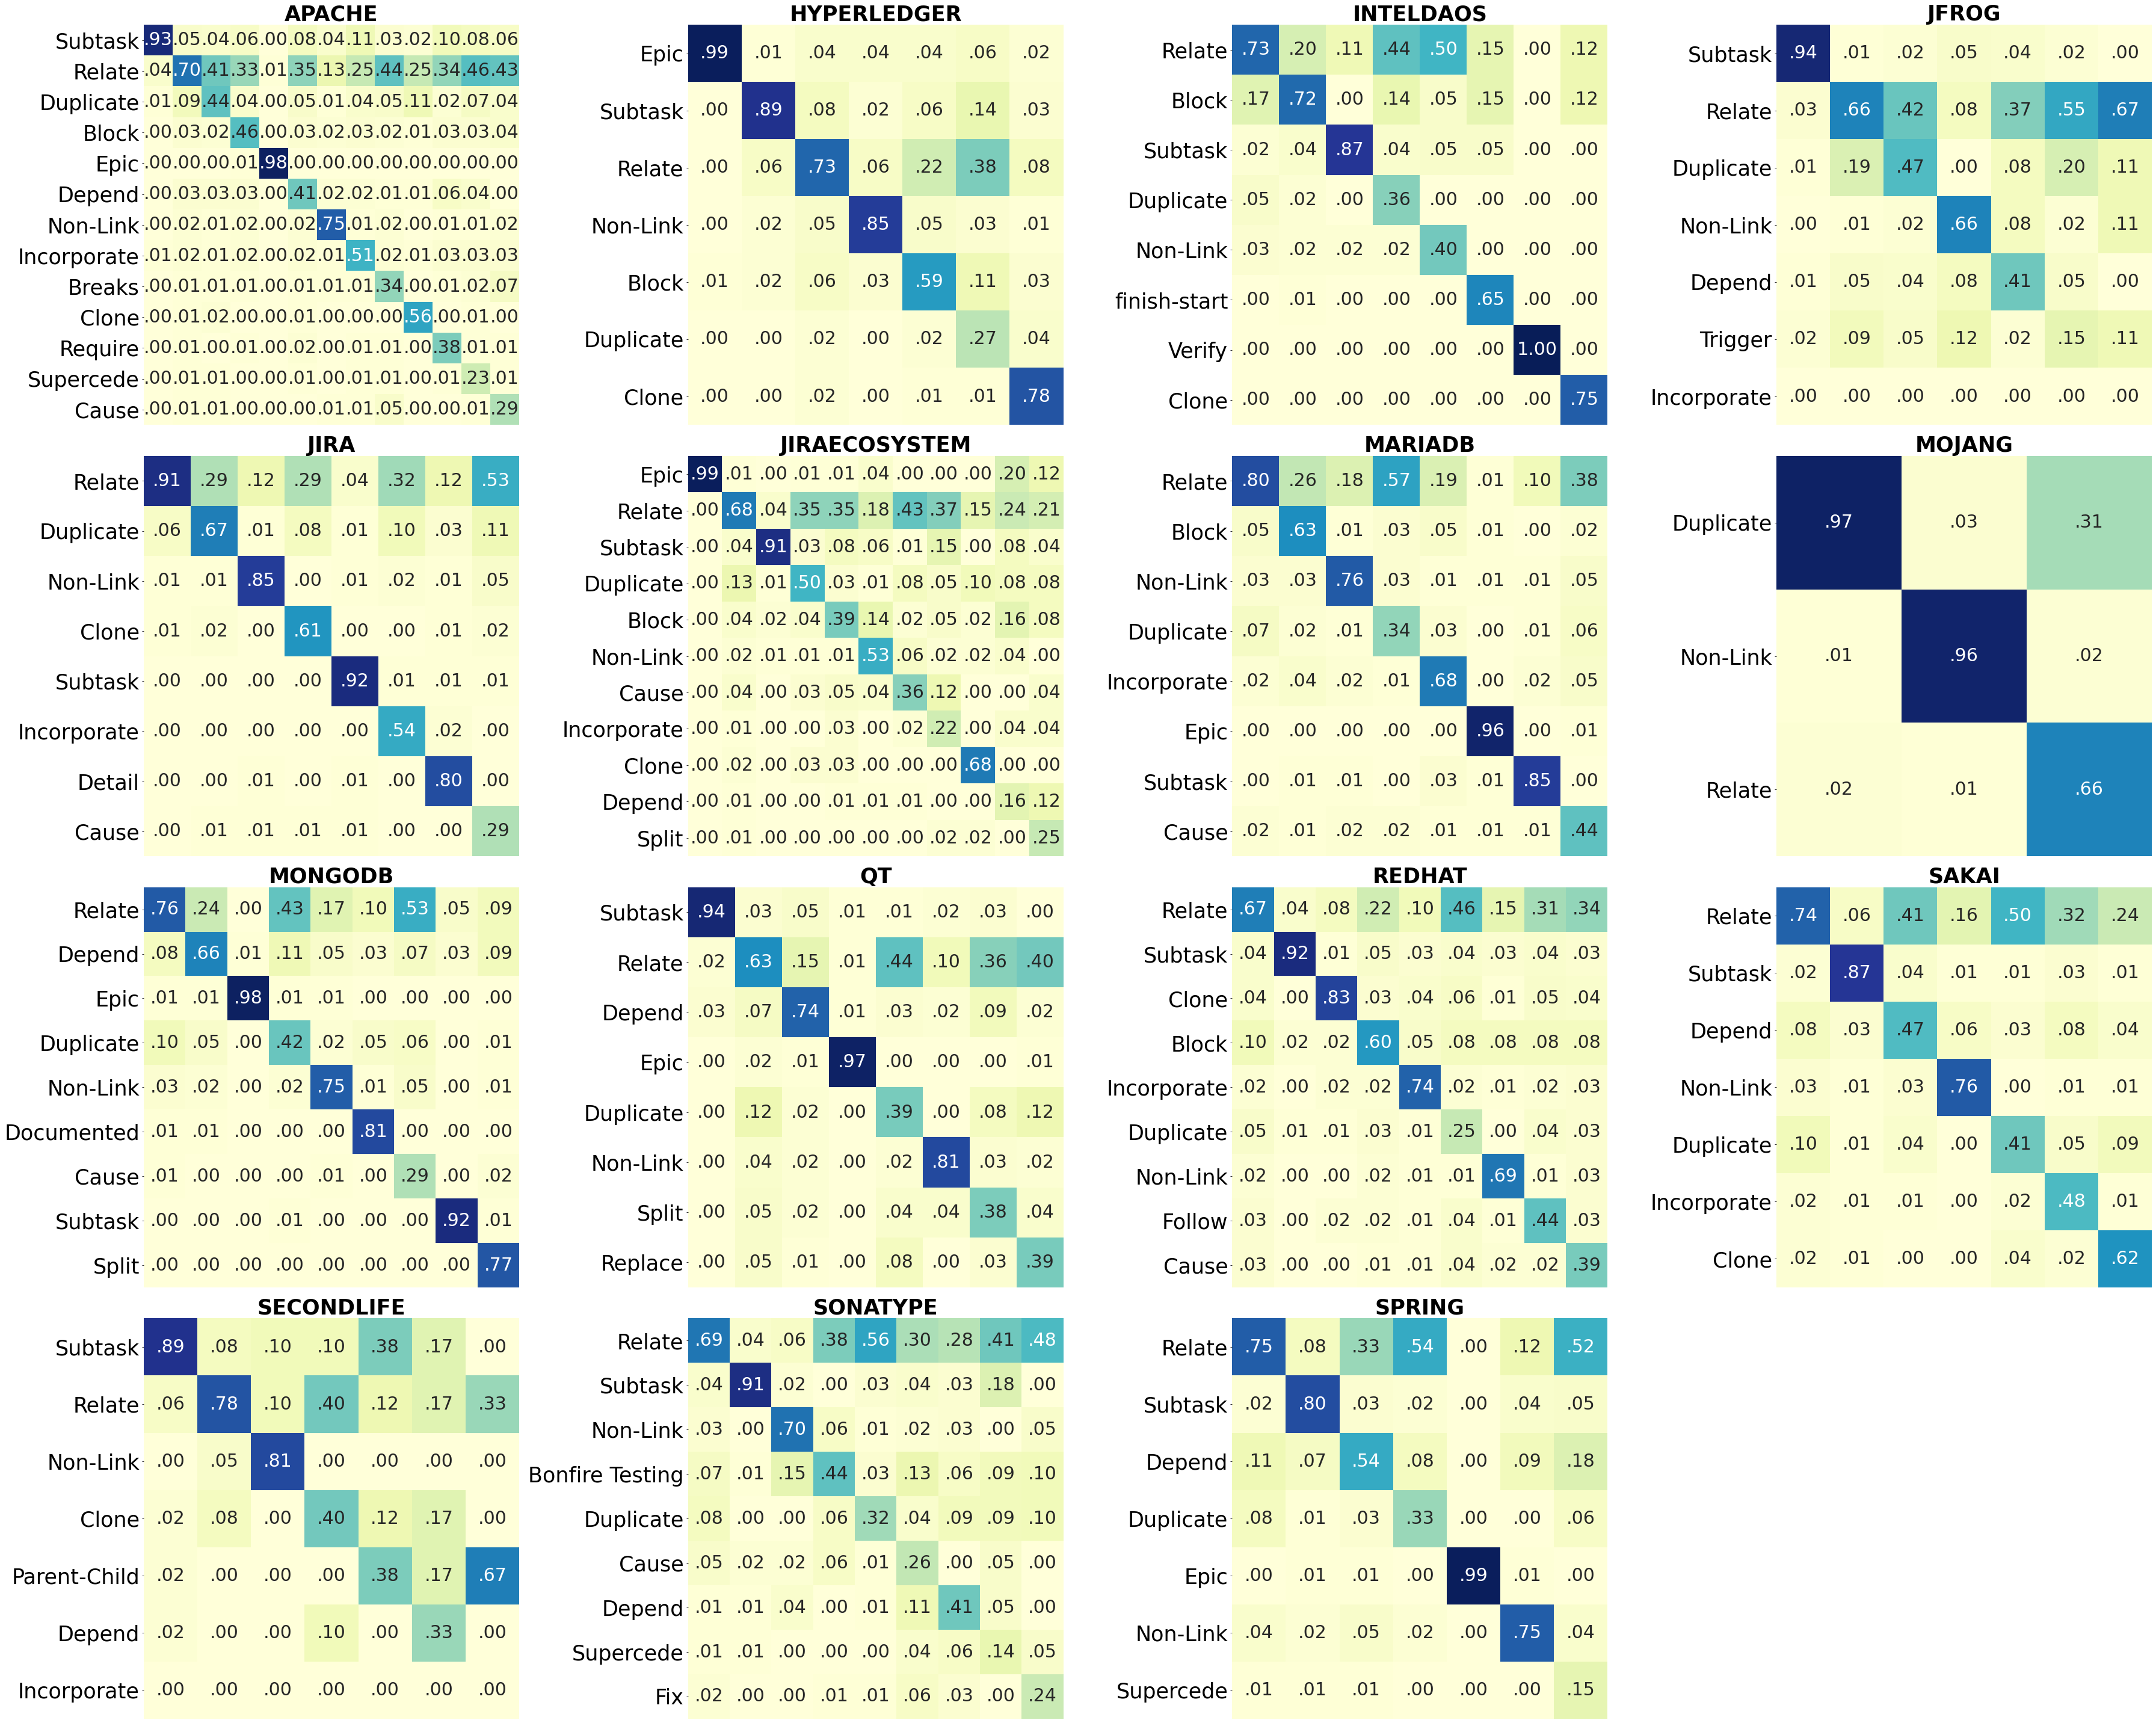

In [32]:
# Plot confusion matrices into one plot and save the figure
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(50, 40))
plt.rc('font', size=14) 

cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=20)

for s, ax in zip(REPOS, axes.flat):
    confmat_df = conf_mat_d[s]
    
    sns.heatmap(confmat_df, ax=ax, cmap="YlGnBu", vmin = 0, vmax = 1, 
                annot=True, cbar = False, xticklabels=False, annot_kws={'size':30}, fmt='.2f')
    ax.set_title(s.upper(), size=35, fontweight='bold')
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 35)
    for text in ax.texts:
        temp = text.get_text()
        temp = temp.replace("0.", ".")
        text.set_text(temp)
    
fig.delaxes(axes[3, 3])
plt.tight_layout()
fig.savefig('pics/confmats.png')

## Correlations of Section "Analysis of Differences" Table 4

In [24]:
# Different Types of Users in an issue tracker
user_numbers = pd.read_csv('data/user_numbers.csv', encoding="UTF-8", low_memory=False, sep=",", index_col=0)
user_numbers

,TotalUsers,Creators,Reporters,Assignees,LinkSetters
Apache,115394,112718,113477,17513,11020
Hyperledger,1805,1638,1643,913,329
IntelDAOS,85,77,77,76,51
JFrog,2713,2677,2664,182,303
Jira,50930,41325,50203,2143,6300
JiraEcosystem,4166,3918,4006,786,760
MariaDB,4229,4216,4220,133,490
Mindville,623,359,617,18,16
Mojang,242589,242506,242240,79,339
MongoDB,7777,7655,7680,646,929


In [36]:
#Drop Mindville from frame
user_numbers.drop(index = ['Mindville'], inplace = True)

In [37]:
user_num = user_numbers.transpose()
user_num

,Apache,Hyperledger,IntelDAOS,JFrog,Jira,JiraEcosystem,MariaDB,Mojang,MongoDB,Qt,RedHat,Sakai,SecondLife,Sonatype,Spring
TotalUsers,115394,1805,85,2713,50930,4166,4229,242589,7777,21386,17698,1584,341,45651,15222
Creators,112718,1638,77,2677,41325,3918,4216,242506,7655,21189,17288,1441,332,45595,15188
Reporters,113477,1643,77,2664,50203,4006,4220,242240,7680,21173,17365,1462,327,45626,15189
Assignees,17513,913,76,182,2143,786,133,79,646,1347,2616,696,95,90,260
LinkSetters,11020,329,51,303,6300,760,490,339,929,614,2685,378,194,1004,121


In [50]:
#Get different properties of repositories
repos = []
means = []
w_means = []
precs = []
w_precs = []
recs = []
w_recs = []
stds = []
accs = []
num_issues = []
num_links = []
num_subproj = []
num_predlts = []
num_linktypes = []
num_coverage = []
num_crossproject = [5.23,  4.62,  3.27,  8.24, 43.42,  6.77,  2.54,  5.43,
       19.09,  6.92, 23.54,  1.37,  2.38,  1.5, 9.96 ]
num_assignees = list(user_num.loc['Assignees'])
num_creators = list(user_num.loc['Creators'])
num_reporter = list(user_num.loc['Reporters'])
num_link_setters = list(user_num.loc['LinkSetters'])
num_totalusers = list(user_num.loc['TotalUsers'])
#  
#        
for s in REPOS:
    class_rep_df = class_rep_d[s]
    repos.append(s)
    means.append(class_rep_df['f1-score'].loc['macro avg'])
    w_means.append(class_rep_df['f1-score'].loc['weighted avg'])
    precs.append(class_rep_df['precision'].loc['macro avg'])
    w_precs.append(class_rep_df['precision'].loc['weighted avg'])
    recs.append(class_rep_df['recall'].loc['macro avg'])
    w_recs.append(class_rep_df['recall'].loc['weighted avg'])
    accs.append(class_rep_df['f1-score'].loc['accuracy'])
    stds.append(class_rep_df['f1-score'].iloc[:-3].std())
    filename = 'data/processed/issues_'+s+'.csv'
    issues = pd.read_csv(filename, encoding="UTF-8", low_memory=False, index_col=['issue_id'], sep=";")
    filename = 'data/processed/links_'+s+'.csv'
    links = pd.read_csv(filename, encoding="UTF-8", low_memory=False, index_col = 0, sep=";")
    links['mappedtype'] = links['linktype'].map(fine_linktype_map)
    linktypes = (links.mappedtype.value_counts()>=len(links)*0.01).rename_axis('mappedtype').reset_index(name='valid')
    valid_types = set(linktypes[linktypes['valid']==True]['mappedtype'])
    actual_types = len(links['linktype'].unique())
    
    num_issues.append(len(issues))
    num_links.append(len(links))
    num_subproj.append(len(issues.projectid.unique()))
    num_linktypes.append(actual_types)
    num_predlts.append(len(valid_types))
    
    issue_set = set(issues.index.values)
    link_set = set(links['issue_id_1']).union(set(links['issue_id_2']))
    
    num_coverage.append(round(len(link_set)/len(issue_set), 3))

stat_dict = {
            'repos': repos,
            'means': means,
            'w_means': w_means,
            'precs': precs,
            'w_precs': w_precs,
            'recs': recs,
            'w_recs': w_recs,
            'stds' : stds,
            'accs': accs,
            'num_issues': num_issues,
            'num_links' : num_links,
            'num_subproj': num_subproj,
            'norm_subproj': np.array(num_subproj)/np.linalg.norm(np.array(num_subproj)),
            'num_linktypes': num_linktypes,
            'num_predlts': num_predlts,
            'num_coverage': num_coverage,
            'num_crossproject': num_crossproject,
            'num_assignees': num_assignees,
            'num_creators': num_creators,
            'num_reporter': num_reporter,
            'num_totalusers': num_totalusers,
            'num_linksetters':num_link_setters
          }

#Put all numbers into a dataframe for further analysis
stat_df = pd.DataFrame(stat_dict)

In [51]:
#Calculate some user ratios
stat_df['assignne_proj_ratio'] = stat_df['num_assignees']/stat_df['num_subproj']
stat_df['assignee_user_ratio'] = stat_df['num_assignees']/stat_df['num_totalusers']
stat_df['issue_user_ratio'] = stat_df['num_issues']/stat_df['num_totalusers']
stat_df['issue_assigne_ratio'] = stat_df['num_issues']/stat_df['num_assignees']

In [52]:
stat_df.sort_values(by='repos')

,repos,means,w_means,precs,w_precs,recs,w_recs,stds,accs,num_issues,...,num_crossproject,num_assignees,num_creators,num_reporter,num_totalusers,num_linksetters,assignne_proj_ratio,assignee_user_ratio,issue_user_ratio,issue_assigne_ratio
0,apache,0.563294,0.698571,0.600568,0.697587,0.537108,0.706092,0.211805,0.706092,1014926,...,5.23,17513,112718,113477,115394,11020,27.109907,0.151767,8.795310,57.952721
1,hyperledger,0.743591,0.845027,0.772558,0.844455,0.730034,0.849945,0.202239,0.849945,28146,...,4.62,913,1638,1643,1805,329,28.531250,0.505817,15.593352,30.828039
2,inteldaos,0.716929,0.675137,0.770386,0.680438,0.685449,0.682785,0.185349,0.682785,9474,...,3.27,76,77,77,85,51,38.000000,0.894118,111.458824,124.657895
3,jfrog,0.477771,0.657492,0.493042,0.662270,0.469026,0.660458,0.323689,0.660458,15535,...,8.24,182,2677,2664,2713,303,18.200000,0.067084,5.726133,85.357143
4,jira,0.733772,0.824133,0.781958,0.823841,0.700739,0.829008,0.189295,0.829008,274545,...,43.42,2143,41325,50203,50930,6300,71.433333,0.042077,5.390634,128.112459
5,jiraecosystem,0.529719,0.712022,0.563632,0.714847,0.516060,0.718857,0.246408,0.718857,41866,...,6.77,786,3918,4006,4166,760,7.782178,0.188670,10.049448,53.264631
6,mariadb,0.697909,0.715708,0.719073,0.714737,0.681969,0.720633,0.190443,0.720633,31229,...,2.54,133,4216,4220,4229,490,12.090909,0.031450,7.384488,234.804511
7,mojang,0.877596,0.945772,0.892037,0.945065,0.864918,0.946967,0.150637,0.946967,420819,...,5.43,79,242506,242240,242589,339,9.875000,0.000326,1.734699,5326.822785
8,mongodb,0.716492,0.721052,0.737034,0.720751,0.706647,0.725881,0.194529,0.725881,137172,...,19.09,646,7655,7680,7777,929,23.925926,0.083065,17.638164,212.340557
9,qt,0.663286,0.712774,0.679933,0.714246,0.653923,0.716990,0.224185,0.716990,148579,...,6.92,1347,21189,21173,21386,614,64.142857,0.062985,6.947489,110.303638


In [53]:
# Median of predicted link types
stat_df['num_predlts'].median()

7.0

In [54]:
# Macro F1 means of of model
print(stat_df['means'].mean())
print(stat_df['means'].std())

# Weighted F1 means of model
print(stat_df['w_means'].mean())
print(stat_df['w_means'].std())

0.639259887955699
0.11409233725012828
0.7313497897789004
0.08004022232002513


In [55]:
import scipy.stats as stats

for i in ['means']:
    print(i)
    for j in ['num_issues', 'num_links', 'num_subproj', 'norm_subproj', 'num_linktypes', 'num_predlts', 'num_coverage', 'num_crossproject', 'num_totalusers', 'num_assignees', 'num_creators', 'num_reporter', 'num_linksetters', 'assignne_proj_ratio', 'assignee_user_ratio', 'issue_user_ratio', 'issue_assigne_ratio']:
        print(j)
        r = stats.pearsonr(stat_df[i], stat_df[j])
        print(np.round(r,4))

means
num_issues
[0.0937 0.7397]
num_links
[0.3523 0.1978]
num_subproj
[-0.2109  0.4505]
norm_subproj
[-0.2109  0.4505]
num_linktypes
[-0.2237  0.4229]
num_predlts
[-0.5039  0.0554]
num_coverage
[0.75   0.0013]
num_crossproject
[0.2439 0.3811]
num_totalusers
[0.4419 0.0991]
num_assignees
[-0.1567  0.5771]
num_creators
[0.4374 0.103 ]
num_reporter
[0.4435 0.0978]
num_linksetters
[-0.0787  0.7804]
assignne_proj_ratio
[0.1301 0.6441]
assignee_user_ratio
[0.1445 0.6074]
issue_user_ratio
[0.2084 0.4561]
issue_assigne_ratio
[0.5208 0.0465]


## Repository Performance Figure 1

In [56]:
# For better Figures
repo_dict = {'apache':'Apache',
 'hyperledger':'Hyperledger',
 'inteldaos':'IntelDAOS',
 'jfrog':'JFrog',
 'jira':'Jira',
 'jiraecosystem':'JiraEcosystem',
 'mariadb':'MariaDB',
 'mojang':'Mojang',
 'mongodb':'MongoDB',
 'qt':'Qt',
 'redhat':'RedHat',
 'sakai':'Sakai',
 'secondlife':'SecondLife',
 'sonatype':'Sonatype',
 'spring':'Spring'}

Starting Notebook.


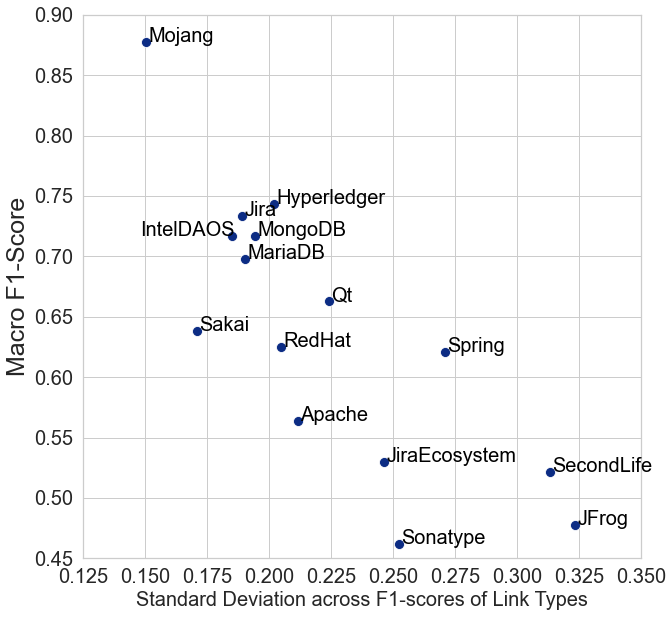

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

print("Starting Notebook.")

sns.set(font_scale = 1)
sns.set_style("whitegrid")

fig = plt.figure(figsize=(10,10))
p1 = sns.scatterplot(x='stds', # Horizontal axis
       y='means', # Vertical axis
       data=stat_df, # Data source
#        size = 'num_predlts',
#         sizes=(200, 2000),
        s=100,
                     color='#0c2c84',
       legend=False)  

for line in range(0,stat_df.shape[0]):
    if line != 2:
        p1.text(stat_df.stds[line]+0.001, stat_df.means[line], 
        repo_dict[stat_df.repos[line]], horizontalalignment='left', 
        size=20, color='black')
    else:
        p1.text(stat_df.stds[line]+0.001, stat_df.means[line], 
        repo_dict[stat_df.repos[line]], horizontalalignment='right', 
        size=20, color='black')

# plt.title('Performance per Repository')
plt.xticks(size=20)
plt.xlim(0.125, 0.35)
plt.yticks(size=20)
plt.ylim(0.45, 0.9)
# Set x-axis label
# plt.xlabel('Accuracy')
plt.xlabel('Standard Deviation across F1-scores of Link Types', size=20)
# Set y-axis label
plt.ylabel('Macro F1-Score', size=25)

fig.savefig('pics/Repo_Performance.png')

## Performance Results Table 3

In [63]:
pred_types = set()

for s in REPOS:
    filename = 'data/processed/links_plus_'+s.lower()+'.csv'
    links = pd.read_csv(filename, encoding="UTF-8", low_memory=False, index_col=0, sep=';')
    links['mappedtype'] = links['linktype'].map(type_dict)

    linktypes = (links.mappedtype.value_counts()>=len(links)*0.01).rename_axis('mappedtype').reset_index(name='valid')
    valid_types = set(linktypes[linktypes['valid']==True]['mappedtype'])
    pred_types = pred_types.union(valid_types)
    

In [64]:
pred_lts = set()

for s in REPOS:
    class_rep_df = class_rep_d[s]
    for i in class_rep_df.index:
        pred_lts.add(i)

count_d = {}
  
# iterating through the elements of list
for i in list(pred_lts):
    count_d[i] = 0

for lt in pred_lts:
    for s in REPOS:
        class_rep_df  = class_rep_d[s]
        if lt in class_rep_df.index:
            count_d[lt] += 1

common_lt = []            
for d in count_d:
    if count_d[d]>3 and d not in ['accuracy', 'macro avg', 'weighted avg']:
        common_lt.append(d)

In [65]:
lt_performance_dict = {}

for lt in common_lt:
    lf_dt = pd.DataFrame(columns = ['LT', 'Precision', 'Recall', 'F1', 'Support', 'Repo'])
    for s in REPOS:
        class_rep_df = class_rep_d[s]
        if lt in class_rep_df.index:
            lf_dt.loc[len(lf_dt)] = [lt] + class_rep_df.loc[lt].values.tolist() + [s]
    lt_performance_dict[lt] = lf_dt

In [66]:
lts = []
pre_means = []
pre_stds = []
rec_means = []
rec_stds = []
f1_means = []
f1_stds = []

for lt in common_lt:
    lt_df = lt_performance_dict[lt]
    pre_means.append(np.mean(lt_df['Precision']))
    pre_stds.append(np.std(lt_df['Precision']))
    rec_means.append(np.mean(lt_df['Recall']))
    rec_stds.append(np.std(lt_df['Recall']))
    f1_means.append(np.mean(lt_df['F1']))
    f1_stds.append(np.std(lt_df['F1']))
    lts.append(lt)

lt_stat_dict = {
            'lts': lts,
            'pre_means': pre_means,
            'pre_stds' : pre_stds,
            'rec_means': rec_means,
            'rec_stds': rec_stds,
            'f1_means' : f1_means,
            'f1_stds': f1_stds,
          }

lt_stat_df = pd.DataFrame(lt_stat_dict)

### Results from 1_LinkTypeAnalysis

In [67]:
diff_d = {'Relate': 52.733333,
'Duplicate' :     56.142857,
'Subtask' :       26.500000,
'Depend'  :       35.444444,
'Clone'   :        9.000000,
'Incorporate' :   56.285714,
'Epic'      :     38.375000,
'Block'     :     65.800000,
'Cause'     :     75.142857,
'Non-Link'  :     53.937500}

In [68]:
len_d = { 'Relate' :        186.600000,
'Duplicate'  :    193.928571,
'Subtask'   :     68.571429,
'Depend'    :     109.222222,
'Clone'     :     141.153846,
'Incorporate':    139.000000,
'Epic'     :       79.625000,
'Block'    :      167.300000,
'Cause'    :      215.428571,
'Non-Link'  :     140.125000,
}

In [69]:
cossim_d = {'Relate'  :       0.292667,
'Duplicate'    :  0.361429,
'Subtask'    :    0.090714,
'Depend'     :    0.201111,
'Clone'      :    0.833077,
'Incorporate':    0.142857,
'Epic'       :    0.050000,
'Block'      :    0.250000,
'Cause'       :   0.185714,
'Non-Link'   :    0.010000,
}

In [70]:
share_d = {'Block':7.040437,
'Cause':3.204718,
'Clone':4.006623,
'Depend':8.592757,
'Duplicate':18.449904,
'Epic':14.517931,
'Incorporate':4.430296,
'Relate':34.814910,
'Subtask':20.891880,
'Non-Link':10}

In [71]:
lt_stat_df['counts'] = lt_stat_df['lts'].map(count_d)

In [72]:
lt_stat_df['diffs'] = lt_stat_df['lts'].map(diff_d)
lt_stat_df['lens'] = lt_stat_df['lts'].map(len_d)
lt_stat_df['cossim'] = lt_stat_df['lts'].map(cossim_d)
lt_stat_df['share'] = lt_stat_df['lts'].map(share_d)

In [73]:
for j in ['counts', 'diffs', 'lens', 'cossim', 'share']:
    print(j)
    r = stats.pearsonr(lt_stat_df['f1_means'], lt_stat_df[j])
    print(np.round(r,4))

counts
[0.2587 0.4704]
diffs
[-0.5098  0.1323]
lens
[-0.6938  0.0261]
cossim
[-0.2061  0.5679]
share
[0.4188 0.2283]


In [74]:
lt_stat_df.sort_values(by='counts', ascending = False)[['lts','f1_means', 'f1_stds']].mean()

<ipython-input-74-e8432d702de2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lt_stat_df.sort_values(by='counts', ascending = False)[['lts','f1_means', 'f1_stds']].mean()


f1_means    0.633232
f1_stds     0.115191
dtype: float64

In [75]:
lt_ov = pd.DataFrame(columns = ['LT', 'Precision', 'Recall', 'F1', 'Support', 'Repo'])
for lt in lt_performance_dict:
    lt_ov = pd.concat([lt_ov, lt_performance_dict[lt]])

In [76]:
lt_ov.reset_index(inplace=True)

In [77]:
lt_ov.drop(columns=['index'], inplace = True)

In [78]:
lt_ov['part'] = 0

for s in REPOS:
    temp_df = lt_ov[lt_ov['Repo'] == s]
#     print(temp_df)
    total_supp = np.sum(temp_df['Support'])
#     print(s)
    for i in temp_df.index:
#         print(i)
#         print(temp_df.loc[i])
        avg = temp_df.loc[i]['Support']/total_supp
#         print(avg)
        lt_ov['part'].loc[i] = avg

<ipython-input-78-1f5c4a255015>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lt_ov['part'].loc[i] = avg


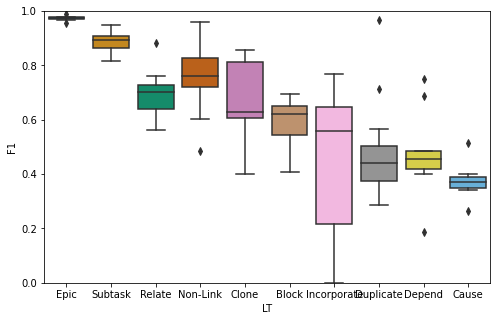

In [79]:
fig = plt.figure(figsize=(8,5))
g = sns.boxplot(x="LT", y="F1", data=lt_ov, order=['Epic', 'Subtask', 'Relate',
                                                  'Non-Link', 'Clone', 'Block',
                                                  'Incorporate', 'Duplicate','Depend',
                                                  'Cause'],
               palette='colorblind')
g.set(ylim=(0, 1))

fig.savefig('pics/LT_f1.png')

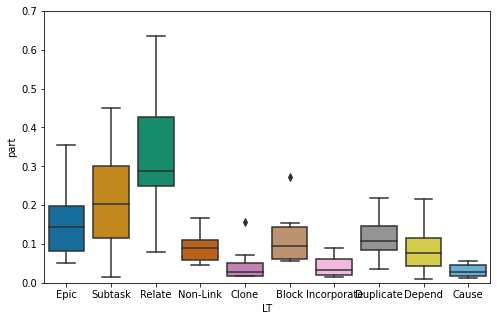

In [80]:
fig = plt.figure(figsize=(8,5))
g = sns.boxplot(x="LT", y="part", data=lt_ov, order=['Epic', 'Subtask', 'Relate',
                                                  'Non-Link', 'Clone', 'Block',
                                                  'Incorporate', 'Duplicate','Depend',
                                                  'Cause'],
               palette='colorblind')
g.set(ylim=(0, 0.7))

fig.savefig('pics/LT_Share.png')

## F1 scores per repository per link type, Table 2

In [83]:
repo_lt_performance_df = pd.pivot_table(lt_ov, values='F1', index=['Repo'],
                    columns=['LT'], aggfunc=np.sum)[['Relate', 'Duplicate', 'Subtask', 
                                                           'Depend', 'Clone', 'Incorporate',
                                                           'Epic', 'Block', 'Cause', 'Non-Link']]

round(repo_lt_performance_df, 3)

LT,Relate,Duplicate,Subtask,Depend,Clone,Incorporate,Epic,Block,Cause,Non-Link
Repo,,,,,,,,,,
apache,0.644,0.490,0.910,0.456,0.612,0.548,0.970,0.520,0.341,0.760
hyperledger,0.704,0.368,0.895,NaN,0.804,NaN,0.969,0.619,NaN,0.846
inteldaos,0.690,0.444,0.821,NaN,0.857,NaN,NaN,0.696,NaN,0.485
jfrog,0.573,0.506,0.948,0.447,NaN,0.000,NaN,NaN,NaN,0.722
jira,0.883,0.714,0.929,NaN,0.612,0.636,NaN,NaN,0.370,0.863
jiraecosystem,0.616,0.567,0.892,0.186,0.587,0.290,0.979,0.406,0.376,0.603
mariadb,0.761,0.369,0.860,NaN,NaN,0.681,0.973,0.659,0.515,0.764
mojang,0.704,0.968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.961
mongodb,0.726,0.465,0.847,0.687,NaN,NaN,0.972,NaN,0.360,0.716


In [84]:
repo_lt_perf_f1_df = repo_lt_performance_df.merge(stat_df[['repos', 'means', 'w_means']], left_on='Repo', right_on='repos')
repo_lt_perf_f1_df.set_index('repos', inplace=True)
means = np.mean(repo_lt_perf_f1_df)
std = np.std(repo_lt_perf_f1_df)
repo_lt_perf_f1_df.loc['Mean'] = means
repo_lt_perf_f1_df.loc['Standard Dev.'] = std

round(repo_lt_perf_f1_df, 3)

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Relate,Duplicate,Subtask,Depend,Clone,Incorporate,Epic,Block,Cause,Non-Link,means,w_means
repos,,,,,,,,,,,,
apache,0.644,0.490,0.910,0.456,0.612,0.548,0.970,0.520,0.341,0.760,0.563,0.699
hyperledger,0.704,0.368,0.895,NaN,0.804,NaN,0.969,0.619,NaN,0.846,0.744,0.845
inteldaos,0.690,0.444,0.821,NaN,0.857,NaN,NaN,0.696,NaN,0.485,0.717,0.675
jfrog,0.573,0.506,0.948,0.447,NaN,0.000,NaN,NaN,NaN,0.722,0.478,0.657
jira,0.883,0.714,0.929,NaN,0.612,0.636,NaN,NaN,0.370,0.863,0.734,0.824
jiraecosystem,0.616,0.567,0.892,0.186,0.587,0.290,0.979,0.406,0.376,0.603,0.530,0.712
mariadb,0.761,0.369,0.860,NaN,NaN,0.681,0.973,0.659,0.515,0.764,0.698,0.716
mojang,0.704,0.968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.961,0.878,0.946
mongodb,0.726,0.465,0.847,0.687,NaN,NaN,0.972,NaN,0.360,0.716,0.716,0.721


In [85]:
def score_color(v):
    if v >= 0.8:
        return "verygood "+str(v)
    elif v >= 0.6:
        return "good "+str(v)
    elif v >= 0.4:
        return "ok "+str(v)
    elif v >= 0.2:
        return "bad "+str(v)
    elif v >= 0.0:
        return "verybad "+str(v)
    else:
        return str(v)

#### Latex Code with Color labels for Table 2

In [86]:
table_2_df = round(repo_lt_perf_f1_df, 2)
for i in table_2_df.columns:
    table_2_df[i] = table_2_df[i].apply(lambda x: score_color(x))

print(table_2_df.to_latex())

\begin{tabular}{lllllllllllll}
\toprule
{} &         Relate &      Duplicate &        Subtask &        Depend &          Clone &  Incorporate &           Epic &        Block &         Cause &       Non-Link &          means &        w\_means \\
repos         &                &                &                &               &                &              &                &              &               &                &                &                \\
\midrule
apache        &      good 0.64 &        ok 0.49 &  verygood 0.91 &       ok 0.46 &      good 0.61 &      ok 0.55 &  verygood 0.97 &      ok 0.52 &      bad 0.34 &      good 0.76 &        ok 0.56 &       good 0.7 \\
hyperledger   &       good 0.7 &       bad 0.37 &  verygood 0.89 &           nan &   verygood 0.8 &          nan &  verygood 0.97 &    good 0.62 &           nan &  verygood 0.85 &      good 0.74 &  verygood 0.85 \\
inteldaos     &      good 0.69 &        ok 0.44 &  verygood 0.82 &           nan &  verygood 0.86 &  

<ipython-input-86-3f36ab9f389a>:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table_2_df.to_latex())


In [87]:
lt_ov

,LT,Precision,Recall,F1,Support,Repo,part
0,Relate,0.595346,0.700187,0.643524,14469.0,apache,0.288319
1,Relate,0.678218,0.73262,0.70437,561.0,hyperledger,0.153614
2,Relate,0.654867,0.729064,0.689977,203.0,inteldaos,0.415133
3,Relate,0.508772,0.655367,0.57284,177.0,jfrog,0.268997
4,Relate,0.854453,0.913332,0.882912,12669.0,jira,0.634338
...,...,...,...,...,...,...,...
98,Incorporate,0.428571,0.219512,0.290323,41.0,jiraecosystem,0.017672
99,Incorporate,0.682609,0.679654,0.681128,231.0,mariadb,0.070298
100,Incorporate,0.798174,0.738274,0.767057,2132.0,redhat,0.090312
101,Incorporate,0.68984,0.483146,0.568282,267.0,sakai,0.059933


### Precision

In [88]:
repo_lt_performance_df = pd.pivot_table(lt_ov, values='Precision', index=['Repo'],
                    columns=['LT'], aggfunc=np.sum)[['Relate', 'Duplicate', 'Subtask', 
                                                           'Depend', 'Clone', 'Incorporate',
                                                           'Epic', 'Block', 'Cause', 'Non-Link']]

round(repo_lt_performance_df, 3)

LT,Relate,Duplicate,Subtask,Depend,Clone,Incorporate,Epic,Block,Cause,Non-Link
Repo,,,,,,,,,,
apache,0.595,0.544,0.891,0.515,0.668,0.595,0.959,0.595,0.423,0.766
hyperledger,0.678,0.565,0.900,NaN,0.831,NaN,0.950,0.645,NaN,0.839
inteldaos,0.655,0.581,0.774,NaN,1.000,NaN,NaN,0.671,NaN,0.615
jfrog,0.509,0.556,0.956,0.488,NaN,0.000,NaN,NaN,NaN,0.796
jira,0.854,0.759,0.942,NaN,0.610,0.773,NaN,NaN,0.515,0.873
jiraecosystem,0.560,0.654,0.872,0.222,0.519,0.429,0.965,0.421,0.390,0.706
mariadb,0.727,0.406,0.873,NaN,NaN,0.683,0.984,0.693,0.616,0.772
mojang,0.749,0.961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.966
mongodb,0.691,0.513,0.787,0.723,NaN,NaN,0.962,NaN,0.488,0.686


In [89]:
repo_lt_perf_f1_df = repo_lt_performance_df.merge(stat_df[['repos', 'precs', 'w_precs']], left_on='Repo', right_on='repos')
repo_lt_perf_f1_df.set_index('repos', inplace=True)
means = np.mean(repo_lt_perf_f1_df)
std = np.std(repo_lt_perf_f1_df)
repo_lt_perf_f1_df.loc['Mean'] = means
repo_lt_perf_f1_df.loc['Standard Dev.'] = std

round(repo_lt_perf_f1_df, 3)

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Relate,Duplicate,Subtask,Depend,Clone,Incorporate,Epic,Block,Cause,Non-Link,precs,w_precs
repos,,,,,,,,,,,,
apache,0.595,0.544,0.891,0.515,0.668,0.595,0.959,0.595,0.423,0.766,0.601,0.698
hyperledger,0.678,0.565,0.900,NaN,0.831,NaN,0.950,0.645,NaN,0.839,0.773,0.844
inteldaos,0.655,0.581,0.774,NaN,1.000,NaN,NaN,0.671,NaN,0.615,0.770,0.680
jfrog,0.509,0.556,0.956,0.488,NaN,0.000,NaN,NaN,NaN,0.796,0.493,0.662
jira,0.854,0.759,0.942,NaN,0.610,0.773,NaN,NaN,0.515,0.873,0.782,0.824
jiraecosystem,0.560,0.654,0.872,0.222,0.519,0.429,0.965,0.421,0.390,0.706,0.564,0.715
mariadb,0.727,0.406,0.873,NaN,NaN,0.683,0.984,0.693,0.616,0.772,0.719,0.715
mojang,0.749,0.961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.966,0.892,0.945
mongodb,0.691,0.513,0.787,0.723,NaN,NaN,0.962,NaN,0.488,0.686,0.737,0.721


### Recall

In [90]:
repo_lt_performance_df = pd.pivot_table(lt_ov, values='Recall', index=['Repo'],
                    columns=['LT'], aggfunc=np.sum)[['Relate', 'Duplicate', 'Subtask', 
                                                           'Depend', 'Clone', 'Incorporate',
                                                           'Epic', 'Block', 'Cause', 'Non-Link']]

round(repo_lt_performance_df, 3)

LT,Relate,Duplicate,Subtask,Depend,Clone,Incorporate,Epic,Block,Cause,Non-Link
Repo,,,,,,,,,,
apache,0.700,0.445,0.930,0.409,0.565,0.508,0.981,0.462,0.285,0.754
hyperledger,0.733,0.273,0.890,NaN,0.779,NaN,0.988,0.595,NaN,0.853
inteldaos,0.729,0.360,0.873,NaN,0.750,NaN,NaN,0.722,NaN,0.400
jfrog,0.655,0.465,0.940,0.412,NaN,0.000,NaN,NaN,NaN,0.661
jira,0.913,0.674,0.917,NaN,0.614,0.541,NaN,NaN,0.289,0.853
jiraecosystem,0.683,0.500,0.912,0.160,0.675,0.220,0.995,0.393,0.364,0.526
mariadb,0.799,0.338,0.848,NaN,NaN,0.680,0.963,0.629,0.443,0.757
mojang,0.664,0.975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957
mongodb,0.764,0.425,0.916,0.656,NaN,NaN,0.984,NaN,0.286,0.749


In [91]:
repo_lt_perf_f1_df = repo_lt_performance_df.merge(stat_df[['repos', 'recs', 'w_recs']], left_on='Repo', right_on='repos')
repo_lt_perf_f1_df.set_index('repos', inplace=True)
means = np.mean(repo_lt_perf_f1_df)
std = np.std(repo_lt_perf_f1_df)
repo_lt_perf_f1_df.loc['Mean'] = means
repo_lt_perf_f1_df.loc['Standard Dev.'] = std

round(repo_lt_perf_f1_df, 3)

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Relate,Duplicate,Subtask,Depend,Clone,Incorporate,Epic,Block,Cause,Non-Link,recs,w_recs
repos,,,,,,,,,,,,
apache,0.700,0.445,0.930,0.409,0.565,0.508,0.981,0.462,0.285,0.754,0.537,0.706
hyperledger,0.733,0.273,0.890,NaN,0.779,NaN,0.988,0.595,NaN,0.853,0.730,0.850
inteldaos,0.729,0.360,0.873,NaN,0.750,NaN,NaN,0.722,NaN,0.400,0.685,0.683
jfrog,0.655,0.465,0.940,0.412,NaN,0.000,NaN,NaN,NaN,0.661,0.469,0.660
jira,0.913,0.674,0.917,NaN,0.614,0.541,NaN,NaN,0.289,0.853,0.701,0.829
jiraecosystem,0.683,0.500,0.912,0.160,0.675,0.220,0.995,0.393,0.364,0.526,0.516,0.719
mariadb,0.799,0.338,0.848,NaN,NaN,0.680,0.963,0.629,0.443,0.757,0.682,0.721
mojang,0.664,0.975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957,0.865,0.947
mongodb,0.764,0.425,0.916,0.656,NaN,NaN,0.984,NaN,0.286,0.749,0.707,0.726
